In [68]:
import numpy as np
import random

# MLP functions

In [69]:
def init_parameters(input_size, hidden_size, output_size):
    weights_1 = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_2 = np.random.uniform(-1, 1, (hidden_size, output_size))
    return weights_1, weights_2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - (x ** 2)

def softmax(x):
   exp_x = np.exp(x - np.max(x))
   return exp_x / exp_x.sum()

def softmax_derivative(x):
   s = softmax(x)
   return s * (1 - s)

def cross_entropy_loss(y_true, y_pred):
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))


def update_weights(weights, weight_changes, learning_rate):
    weights += learning_rate * weight_changes
    weight_changes = 0
    return weights , weight_changes

In [70]:
def train(X_train, y_train, input_size, hidden_size, output_size, 
          learning_rate=0.1, epochs=10000, print_every=1000):
    # Initialize weights
    weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)
    
    error_list = []
    for epoch in range(epochs):
        error_sum = 0
        for I, T in zip(X_train, y_train):
            # Forward propagate
            hidden_output, final_output = forward(I, weights_1, weights_2)
            
            # Backward propagate
            weight_changes_1, weight_changes_2, error = backward(
                I, hidden_output, final_output, T, weights_2)
            error_sum += error
            
            # Update weights
            weights_1, weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
            weights_2, weight_changes_2 = update_weights(weights_2, weight_changes_2, learning_rate)
        
        error_list.append(error_sum)
        
        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Error: {error_sum:.4f}")
    
    return weights_1, weights_2, error_list

# Part 1

In [86]:

def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = sigmoid(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * sigmoid_derivative(final_output)
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * sigmoid_derivative(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, np.mean(output_errors ** 2)

In [87]:
def train(X_train, y_train, input_size, hidden_size, output_size, 
          learning_rate=0.1, epochs=10000, print_every=1000):
    # Initialize weights
    weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)
    
    error_list = []
    for epoch in range(epochs):
        error_sum = 0
        for I, T in zip(X_train, y_train):
            # Forward propagate
            hidden_output, final_output = forward(I, weights_1, weights_2)
            
            # Backward propagate
            weight_changes_1, weight_changes_2, error = backward(
                I, hidden_output, final_output, T, weights_2)
            error_sum += error
            
            # Update weights
            weights_1, weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
            weights_2, weight_changes_2 = update_weights(weights_2, weight_changes_2, learning_rate)
        
        error_list.append(error_sum)
        
        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Error: {error_sum:.4f}")
    
    return weights_1, weights_2, error_list, learning_rate,hidden_size

In [88]:
input_size = 2
hidden_size = 4
output_size = 1
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])


learning_rate = 0.1
epochs = 10000
error_list = []



weights_1, weights_2, error_list, learning_rate,hidden_size = train(inputs, targets, input_size,hidden_size,output_size,learning_rate,epochs,print_every=1 )



Epoch 0, Error: 1.2931
Epoch 1, Error: 1.2849
Epoch 2, Error: 1.2768
Epoch 3, Error: 1.2688
Epoch 4, Error: 1.2609
Epoch 5, Error: 1.2530
Epoch 6, Error: 1.2453
Epoch 7, Error: 1.2376
Epoch 8, Error: 1.2301
Epoch 9, Error: 1.2227
Epoch 10, Error: 1.2154
Epoch 11, Error: 1.2083
Epoch 12, Error: 1.2013
Epoch 13, Error: 1.1944
Epoch 14, Error: 1.1877
Epoch 15, Error: 1.1812
Epoch 16, Error: 1.1748
Epoch 17, Error: 1.1685
Epoch 18, Error: 1.1624
Epoch 19, Error: 1.1565
Epoch 20, Error: 1.1508
Epoch 21, Error: 1.1452
Epoch 22, Error: 1.1398
Epoch 23, Error: 1.1345
Epoch 24, Error: 1.1294
Epoch 25, Error: 1.1245
Epoch 26, Error: 1.1197
Epoch 27, Error: 1.1152
Epoch 28, Error: 1.1107
Epoch 29, Error: 1.1065
Epoch 30, Error: 1.1023
Epoch 31, Error: 1.0984
Epoch 32, Error: 1.0946
Epoch 33, Error: 1.0909
Epoch 34, Error: 1.0874
Epoch 35, Error: 1.0840
Epoch 36, Error: 1.0808
Epoch 37, Error: 1.0777
Epoch 38, Error: 1.0747
Epoch 39, Error: 1.0719
Epoch 40, Error: 1.0692
Epoch 41, Error: 1.0666
Ep


Training with learning_rate=0.01, hidden_size=2
Epoch 0, Error: 1.0265
Epoch 2000, Error: 0.6648
Epoch 4000, Error: 0.3131
Epoch 6000, Error: 0.1518
Epoch 8000, Error: 0.0884

Training with learning_rate=0.01, hidden_size=4
Epoch 0, Error: 1.3055
Epoch 2000, Error: 0.1052
Epoch 4000, Error: 0.0140
Epoch 6000, Error: 0.0063
Epoch 8000, Error: 0.0039

Training with learning_rate=0.01, hidden_size=6
Epoch 0, Error: 1.4637
Epoch 2000, Error: 0.0258
Epoch 4000, Error: 0.0082
Epoch 6000, Error: 0.0047
Epoch 8000, Error: 0.0032

Training with learning_rate=0.1, hidden_size=2
Epoch 0, Error: 1.5179
Epoch 2000, Error: 0.0167
Epoch 4000, Error: 0.0069
Epoch 6000, Error: 0.0043
Epoch 8000, Error: 0.0038

Training with learning_rate=0.1, hidden_size=4
Epoch 0, Error: 1.1323
Epoch 2000, Error: 0.0015
Epoch 4000, Error: 0.0007
Epoch 6000, Error: 0.0004
Epoch 8000, Error: 0.0003

Training with learning_rate=0.1, hidden_size=6
Epoch 0, Error: 1.1317
Epoch 2000, Error: 0.0012
Epoch 4000, Error: 0.0005

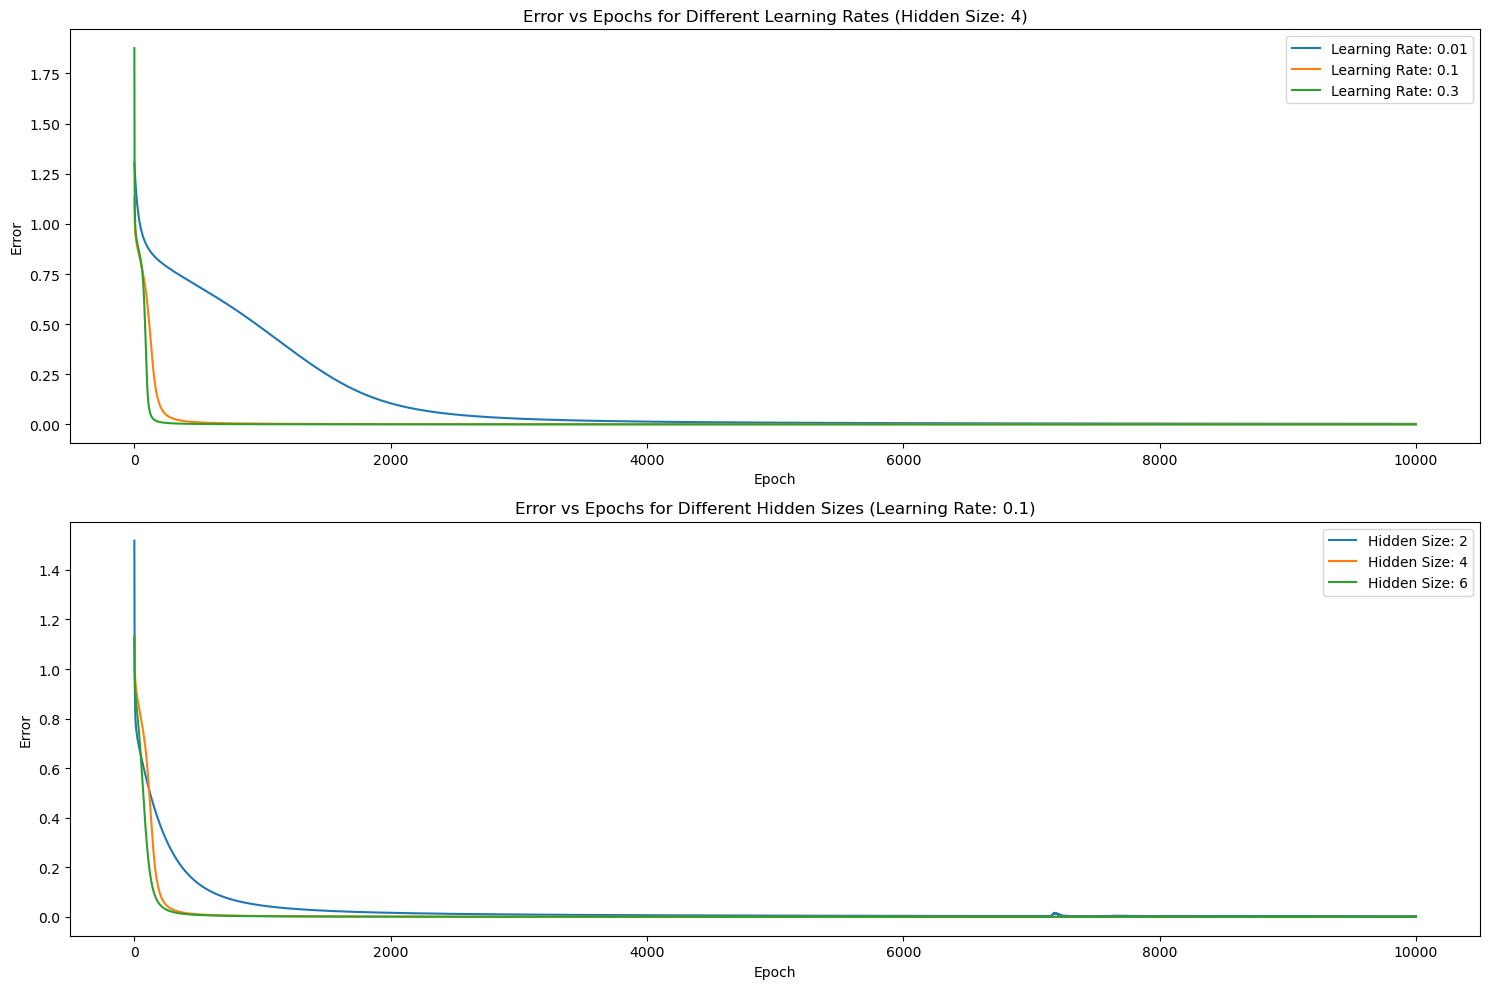


Best configuration:
Learning rate: 0.3
Hidden size: 6
Final error: 0.0001


In [97]:
import matplotlib.pyplot as plt
import numpy as np
input_size = 2

output_size = 1
learning_rates = [0.01, 0.1, 0.3]
hidden_sizes = [2, 4, 6]
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

def compare_hyperparameters(inputs, targets,learning_rates, hidden_sizes,input_size,output_size,epochs=1000):
    # Define different hyperparameter combinations to test
 
    results = []
    
    # Train networks with different hyperparameters
    for lr in learning_rates:
        for hs in hidden_sizes:
            print(f"\nTraining with learning_rate={lr}, hidden_size={hs}")
            weights_1, weights_2, error_list, lr, hs = train(
                inputs, 
                targets,
                input_size=input_size,
                hidden_size=hs,
                output_size=output_size,
                learning_rate=lr,
                epochs=epochs,
                print_every=2000
            )
            results.append({
                'learning_rate': lr,
                'hidden_size': hs,
                'errors': error_list
            })
    
    # Create plots
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Compare learning rates (for fixed hidden size)
    plt.subplot(2, 1, 1)
    hidden_size_to_plot = hidden_sizes[1]  # middle value
    for result in results:
        if result['hidden_size'] == hidden_size_to_plot:
            plt.plot(result['errors'], 
                    label=f"Learning Rate: {result['learning_rate']}")
    plt.title(f'Error vs Epochs for Different Learning Rates (Hidden Size: {hidden_size_to_plot})')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    
    # Plot 2: Compare hidden sizes (for fixed learning rate)
    plt.subplot(2, 1, 2)
    learning_rate_to_plot = learning_rates[1]  # middle value
    for result in results:
        if result['learning_rate'] == learning_rate_to_plot:
            plt.plot(result['errors'], 
                    label=f"Hidden Size: {result['hidden_size']}")
    plt.title(f'Error vs Epochs for Different Hidden Sizes (Learning Rate: {learning_rate_to_plot})')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    
    plt.tight_layout()
    plt.show()
    
    # Print best performing configuration
    final_errors = [(result['learning_rate'], 
                    result['hidden_size'], 
                    result['errors'][-1]) 
                   for result in results]
    best_lr, best_hs, best_error = min(final_errors, key=lambda x: x[2])
    print(f"\nBest configuration:")
    print(f"Learning rate: {best_lr}")
    print(f"Hidden size: {best_hs}")
    print(f"Final error: {best_error:.4f}")
    
    return results

# Run comparison
results = compare_hyperparameters(inputs, targets,learning_rates, hidden_sizes,input_size,output_size, epochs=10000)

3.1. Transfer Derivative

Given an output value from a neuron, we need to calculate it’s slope.

We are using the sigmoid transfer function, the derivative of which can be calculated as follows:

In [98]:
for I in inputs:
    _, final_output = forward(I, weights_1, weights_2)
    print(f"Input: {I}, Predicted Output: {final_output}")

ValueError: shapes (2,) and (4,5) not aligned: 2 (dim 0) != 4 (dim 0)

# Part 2

In [ ]:

def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = tanh(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = tanh(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * tanh_derivative(final_output)
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * tanh_derivative(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, np.mean(output_errors ** 2)

In [ ]:
import numpy as np


input_vectors = np.random.uniform(-1, 1, (500, 4))
input_vectors


array([[ 0.58276781,  0.42643695,  0.95516602, -0.74409115],
       [-0.20404802,  0.51002925, -0.78325312, -0.07235236],
       [-0.31540171, -0.57229861, -0.88971634, -0.04098943],
       ...,
       [ 0.24023065,  0.66461202,  0.50523244,  0.13353031],
       [-0.91164982,  0.58751753, -0.93813869, -0.96823165],
       [ 0.65749309,  0.9956434 , -0.72138316,  0.79361518]])

In [ ]:

# Calculate target outputs using sin(x1-x2+x3-x4)
targets = np.sin(input_vectors[:, 0] - input_vectors[:, 1] + 
                input_vectors[:, 2] - input_vectors[:, 3])#

"""targets = targets.reshape(-1, 1)  # Reshape to column vector
"""
targets

array([ 0.9597202 , -0.98938734, -0.55788071, -0.1158193 ,  0.67523833,
       -0.81374173,  0.79351534,  0.65277676, -0.69212184,  0.65941714,
       -0.95668287,  0.80529019, -0.59001605, -0.49634858,  0.08837064,
        0.82520152,  0.95888643, -0.81967159, -0.64792706,  0.03447055,
        0.38814985, -0.68088232, -0.14146406,  0.99788659,  0.99362607,
        0.98460761, -0.90599128,  0.92336035, -0.50193348,  0.51563444,
       -0.66466809,  0.99378026, -0.19720183, -0.7766136 ,  0.20717319,
       -0.24245009, -0.5702402 , -0.97664407, -0.99410958, -0.41896958,
        0.99728771, -0.1395003 , -0.05595724,  0.23452979, -0.04649921,
        0.66925081,  0.21332311,  0.63983371,  0.2167055 , -0.95481655,
        0.98274227, -0.61673833, -0.7597566 ,  0.9756027 , -0.72204834,
       -0.30765538,  0.08319171,  0.65417667,  0.9434573 ,  0.35972351,
       -0.9021006 , -0.37407062,  0.75602924, -0.87258174,  0.66500909,
        0.27374835,  0.90778764,  0.27805814,  0.42908827, -0.55

In [99]:
train_size = 400
test_size = 100

X_train = input_vectors[:train_size]
y_train = targets[:train_size]
X_test = input_vectors[train_size:train_size+test_size]
y_test = targets[train_size:train_size+test_size]



In [100]:

# Neural network parameters
input_size = 4
hidden_size = 5
output_size = 1
learning_rate = 0.1
epochs = 1000




weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)

weights_1, weights_2, error_list, learning_rate,hidden_size = train(X_train, y_train, input_size,hidden_size,output_size,learning_rate,epochs,print_every=1 )




Epoch 0, Error: 1.0405
Epoch 1, Error: 0.9953
Epoch 2, Error: 0.9560
Epoch 3, Error: 0.9190
Epoch 4, Error: 0.8830
Epoch 5, Error: 0.8475
Epoch 6, Error: 0.8124
Epoch 7, Error: 0.7779
Epoch 8, Error: 0.7441
Epoch 9, Error: 0.7112
Epoch 10, Error: 0.6793
Epoch 11, Error: 0.6487
Epoch 12, Error: 0.6193
Epoch 13, Error: 0.5913
Epoch 14, Error: 0.5646
Epoch 15, Error: 0.5392
Epoch 16, Error: 0.5150
Epoch 17, Error: 0.4921
Epoch 18, Error: 0.4703
Epoch 19, Error: 0.4496
Epoch 20, Error: 0.4299
Epoch 21, Error: 0.4112
Epoch 22, Error: 0.3934
Epoch 23, Error: 0.3764
Epoch 24, Error: 0.3602
Epoch 25, Error: 0.3448
Epoch 26, Error: 0.3300
Epoch 27, Error: 0.3160
Epoch 28, Error: 0.3026
Epoch 29, Error: 0.2897
Epoch 30, Error: 0.2775
Epoch 31, Error: 0.2658
Epoch 32, Error: 0.2546
Epoch 33, Error: 0.2440
Epoch 34, Error: 0.2338
Epoch 35, Error: 0.2242
Epoch 36, Error: 0.2149
Epoch 37, Error: 0.2061
Epoch 38, Error: 0.1977
Epoch 39, Error: 0.1897
Epoch 40, Error: 0.1821
Epoch 41, Error: 0.1749
Ep


Training with learning_rate=0.01, hidden_size=2
Epoch 0, Error: 1.8188

Training with learning_rate=0.01, hidden_size=4
Epoch 0, Error: 2.4452

Training with learning_rate=0.01, hidden_size=6
Epoch 0, Error: 1.2899

Training with learning_rate=0.1, hidden_size=2
Epoch 0, Error: 1.5986

Training with learning_rate=0.1, hidden_size=4
Epoch 0, Error: 2.5874

Training with learning_rate=0.1, hidden_size=6
Epoch 0, Error: 1.2544

Training with learning_rate=0.3, hidden_size=2
Epoch 0, Error: 2.9427

Training with learning_rate=0.3, hidden_size=4
Epoch 0, Error: 2.0541

Training with learning_rate=0.3, hidden_size=6
Epoch 0, Error: 4.0445


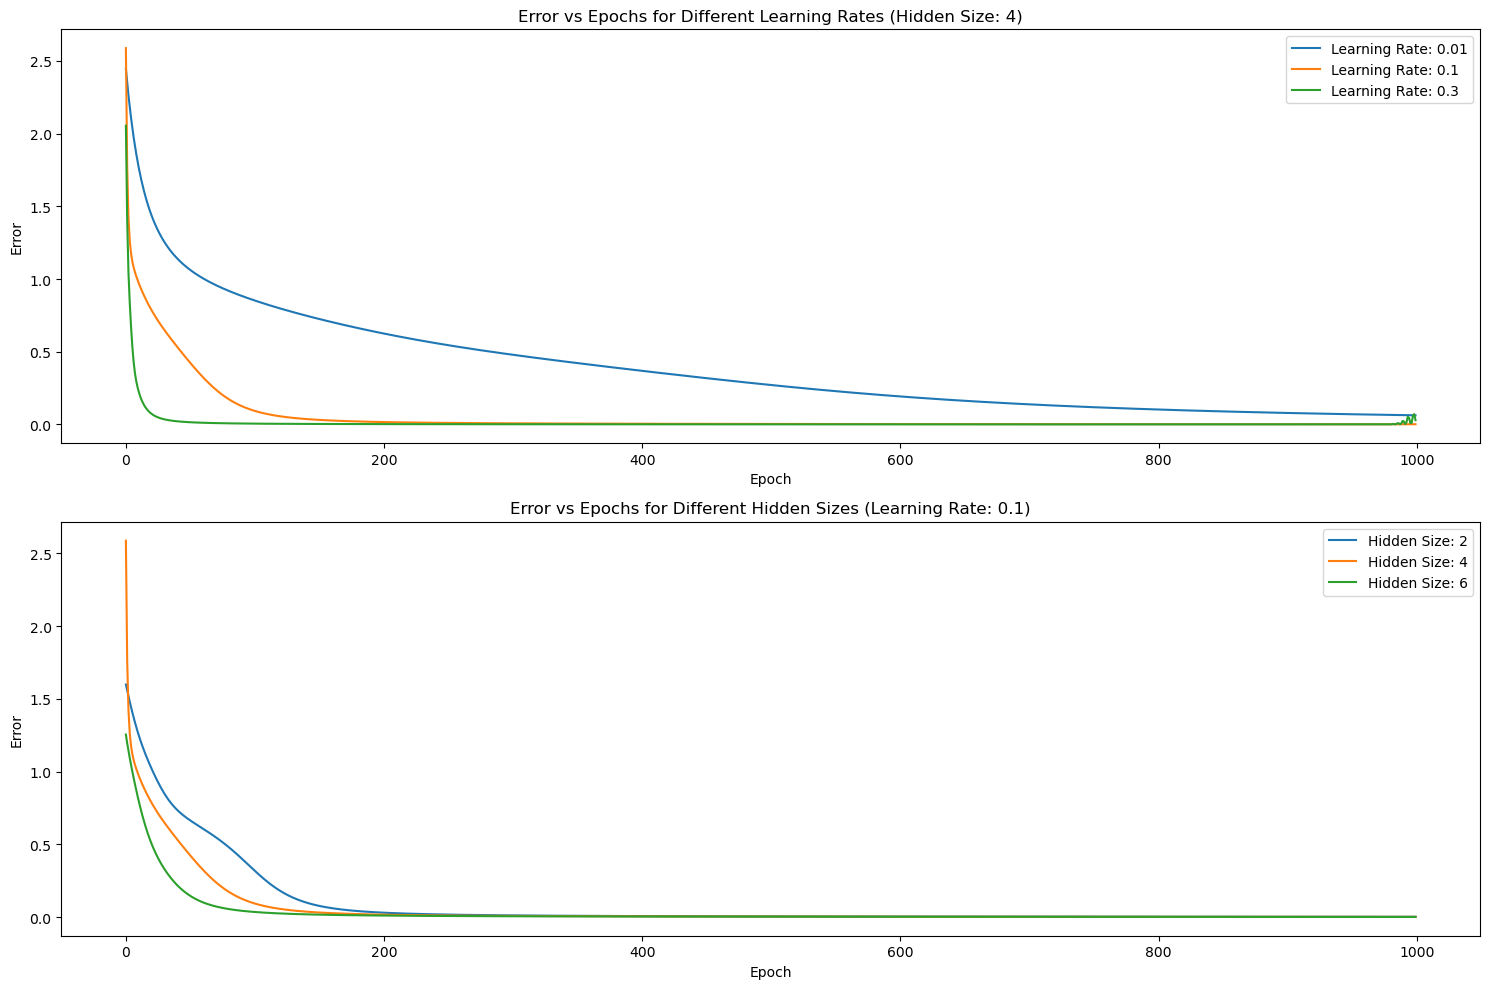


Best configuration:
Learning rate: 0.3
Hidden size: 6
Final error: 0.0007


In [101]:
results = compare_hyperparameters(X_train, y_train,learning_rates, hidden_sizes,input_size,output_size)


In [ ]:
error_list = []


for epoch in range(epochs):
    error_sum = 0
    for I, T in zip(X_train, y_train):


        #Forward propograte
        hidden_output, final_output = forward(I, weights_1, weights_2)
        
        #Backward propogate
        weight_changes_1, weight_changes_2, error = backward(
            I, hidden_output, final_output, T, weights_2)
        
        error_sum += error
        
        #Update weights
        weights_1 , weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
        weights_2 , weight_changes_2= update_weights(weights_2, weight_changes_2, learning_rate)
    error_list.append(error_sum)
    # Optionally print error every 1000 epochs
    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Error: {error_sum}")


In [102]:
# Make predictions on the test set
test_predictions = []
for x in X_test:
    hidden_output, final_output = forward(x, weights_1, weights_2)
    test_predictions.append(final_output[0])

# Calculate test set error
test_error = np.mean(np.abs(y_test - test_predictions))
print(f"Test set error: {test_error:.4f}")


Test set error: nan


/home/carlo/miniconda3/envs/ml-python/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/carlo/miniconda3/envs/ml-python/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Part 3

In [ ]:


def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = softmax(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = softmax(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * softmax_derivative(final_output)
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * softmax_derivative(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, cross_entropy_loss(targets, final_output)



In [66]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd


df = pd.read_csv("letter-recognition.data", header=None)
targets_raw = df[0].values.reshape(-1, 1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(targets_raw).toarray()

inputs = df.iloc[:, 1:].values
inputs,targets

(array([[ 2,  8,  3, ...,  8,  0,  8],
        [ 5, 12,  3, ...,  8,  4, 10],
        [ 4, 11,  6, ...,  7,  3,  9],
        ...,
        [ 6,  9,  6, ..., 12,  2,  4],
        [ 2,  3,  4, ...,  9,  5,  8],
        [ 4,  9,  6, ...,  7,  2,  8]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]))

In [67]:
total_samples = len(inputs)
train_size = int(0.8 * total_samples)  # 80% for training
test_size = total_samples - train_size  # remaining 20% for testing

X_train = inputs[:train_size]
y_train = targets[:train_size]
X_test = inputs[train_size:]
y_test = targets[train_size:]


In [21]:

# Neural network parameters
input_size = 16
hidden_size = 50
output_size = 26
learning_rate = 0.3
epochs = 30

# Initialize weights
weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)


error_list = []


for epoch in range(epochs):
    error_sum = 0
    for I, T in zip(X_train, y_train):


        #Forward propograte
        hidden_output, final_output = forward(I, weights_1, weights_2)
        
        #Backward propogate
        weight_changes_1, weight_changes_2, error = backward(
            I, hidden_output, final_output, T, weights_2)
        
        error_sum += error
        
        #Update weights
        weights_1 , weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
        weights_2 , weight_changes_2= update_weights(weights_2, weight_changes_2, learning_rate)
    error_list.append(error_sum)
    # Optionally print error every 1000 epochs
    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Error: {error_sum}")

Epoch 0, Error: 47773.704166836804
Epoch 1, Error: 43726.11867573606
Epoch 2, Error: 42885.26838434069
Epoch 3, Error: 42558.23618387203
Epoch 4, Error: 42483.77612890817
Epoch 5, Error: 42450.88088272672
Epoch 6, Error: 42475.02958101838
Epoch 7, Error: 42486.63149809909
Epoch 8, Error: 42536.85991023001
Epoch 9, Error: 42590.9976288454
Epoch 10, Error: 42558.45626523487
Epoch 11, Error: 42316.91899337709
Epoch 12, Error: 42104.605700564745
Epoch 13, Error: 41975.80568084979
Epoch 14, Error: 41769.57990700415
Epoch 15, Error: 41612.28769624067
Epoch 16, Error: 41518.328455642506
Epoch 17, Error: 41395.576787068276
Epoch 18, Error: 41344.77274563332
Epoch 19, Error: 41388.99340013037
Epoch 20, Error: 41500.199615033904
Epoch 21, Error: 41712.21012946511
Epoch 22, Error: 41820.74229083056
Epoch 23, Error: 41779.95185196211
Epoch 24, Error: 41639.040850836216
Epoch 25, Error: 41316.469640124364
Epoch 26, Error: 40961.15939907241
Epoch 27, Error: 40741.1759446496
Epoch 28, Error: 40657.96

In [27]:
test_predictions

array([[7.47574859e-02, 4.78421692e-02, 4.67613564e-03, ...,
        3.71940972e-03, 2.90398988e-02, 5.00725402e-03],
       [5.46301510e-03, 6.47691580e-04, 1.12504847e-03, ...,
        2.06235231e-03, 1.36453714e-01, 3.14753453e-04],
       [7.47574859e-02, 4.78421692e-02, 4.67613564e-03, ...,
        3.71940972e-03, 2.90398988e-02, 5.00725402e-03],
       ...,
       [5.46301510e-03, 6.47691580e-04, 1.12504847e-03, ...,
        2.06235231e-03, 1.36453714e-01, 3.14753453e-04],
       [6.66496204e-03, 3.24300832e-02, 7.28878247e-02, ...,
        7.32843760e-02, 2.80772868e-03, 4.69394073e-02],
       [7.05389321e-01, 1.10447485e-02, 1.20691131e-03, ...,
        1.70982008e-03, 2.55908440e-04, 1.53142796e-02]])

In [26]:
# Make predictions on the test set
test_predictions = []
for x in X_test:
    hidden_output, final_output = forward(x, weights_1, weights_2)
    test_predictions.append(final_output)

# Convert list to numpy array
test_predictions = np.array(test_predictions)

print("y_test shape:", y_test.shape)
print("test_predictions shape:", test_predictions.shape)

# Calculate both errors
mae_error = np.mean(np.abs(y_test - test_predictions))
cross_entropy_error = cross_entropy_loss(y_test, test_predictions)

print(f"MAE error: {mae_error:.4f}")
print(f"Cross-entropy error: {cross_entropy_error:.4f}")

# Calculate accuracy
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test accuracy: {accuracy:.4f}")

# Print sample prediction probabilities
print("\nSample prediction distribution:")
print(np.round(test_predictions[0], 3))

y_test shape: (4000, 26)
test_predictions shape: (4000, 26)
MAE error: 0.0681
Cross-entropy error: 10269.9070
Test accuracy: 0.1648

Sample prediction distribution:
[0.075 0.048 0.005 0.024 0.011 0.007 0.048 0.108 0.004 0.006 0.032 0.004
 0.187 0.116 0.044 0.014 0.056 0.056 0.009 0.004 0.038 0.025 0.043 0.004
 0.029 0.005]


In [24]:
# Make predictions on the test set
test_predictions = []
for x in X_test:
    hidden_output, final_output = forward(x, weights_1, weights_2)
    test_predictions.append(final_output[0])

# Calculate test set error
test_error = np.mean(np.abs(y_test - test_predictions))
print(f"Test set error: {test_error:.4f}")


ValueError: operands could not be broadcast together with shapes (4000,26) (4000,) 

In [71]:
input_size = 2
hidden_size = 4
output_size = 1
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)

learning_rates = [0.01, 0.1, 0.2, 0.3,0.7]
epochs = 10000
error_dict = {}

for lr in learning_rates:
    # Initialize weights for each learning rate
    weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)
    
    # Initialize a list to store the errors
    error_list = []
    
    # Training loop
    for epoch in range(epochs):
        error_sum = 0
        for I, T in zip(inputs, targets):

            # Forward propagate
            hidden_output, final_output = forward(I, weights_1, weights_2)
            
            # Backward propagate
            weight_changes_1, weight_changes_2, error = backward(
                I, hidden_output, final_output, T, weights_2)
            
            error_sum += error
            
            # Update weights
            weights_1, weight_changes_1 = update_weights(weights_1, weight_changes_1, lr)
            weights_2, weight_changes_2 = update_weights(weights_2, weight_changes_2, lr)
        
        # Append the error_sum to the error_list
        error_list.append(error_sum)
    
    # Store the error_list in the dictionary with the learning rate as key
    error_dict[lr] = error_list
    
    # Optionally print error every 1000 epochs
    if epochs <= 1000 or epoch % (epochs // 10) == 0:
        print(f"Learning Rate {lr}, Epoch {epoch}, Error: {error_sum}")

In [72]:
error_dict

{0.01: [np.float64(1.0317780583891578),
  np.float64(1.0316693369317824),
  np.float64(1.031560973997776),
  np.float64(1.0314529685299498),
  np.float64(1.031345319473259),
  np.float64(1.031238025774808),
  np.float64(1.031131086383851),
  np.float64(1.031024500251796),
  np.float64(1.0309182663322058),
  np.float64(1.0308123835808003),
  np.float64(1.0307068509554598),
  np.float64(1.030601667416227),
  np.float64(1.0304968319253085),
  np.float64(1.0303923434470765),
  np.float64(1.0302882009480727),
  np.float64(1.0301844033970078),
  np.float64(1.030080949764766),
  np.float64(1.0299778390244043),
  np.float64(1.029875070151156),
  np.float64(1.029772642122432),
  np.float64(1.0296705539178221),
  np.float64(1.0295688045190967),
  np.float64(1.0294673929102092),
  np.float64(1.0293663180772958),
  np.float64(1.0292655790086793),
  np.float64(1.0291651746948682),
  np.float64(1.0290651041285592),
  np.float64(1.0289653663046385),
  np.float64(1.0288659602201826),
  np.float64(1.02

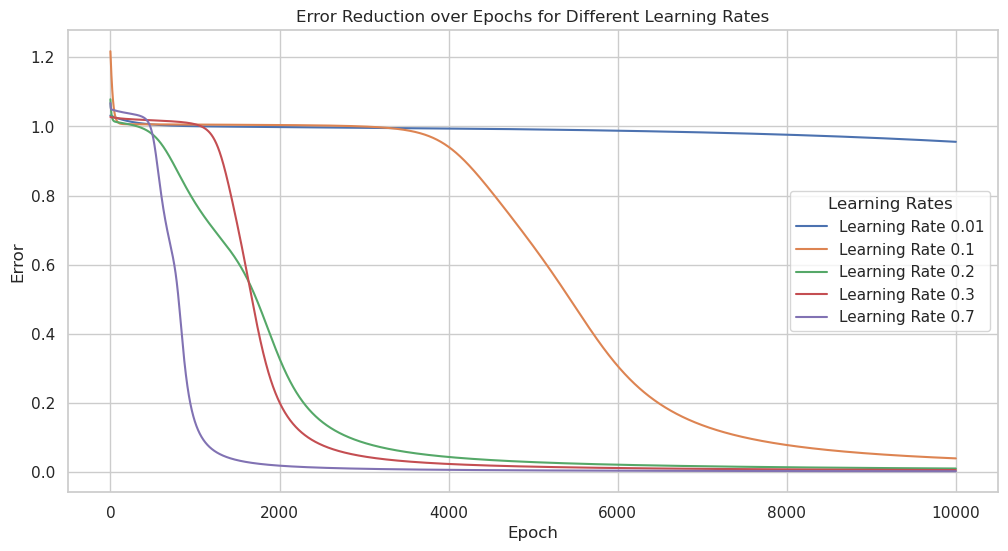

In [73]:
import seaborn as sns


import matplotlib.pyplot as plt
# Plotting the error reduction over epochs for different learning rates
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    sns.lineplot(x=range(epochs), y=error_dict[lr], label=f'Learning Rate {lr}')

plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Reduction over Epochs for Different Learning Rates')
plt.legend(title='Learning Rates')
plt.show()

Input: [0 0], Predicted Output: [0.06329275]
Input: [0 1], Predicted Output: [0.99347015]
Input: [1 0], Predicted Output: [0.99345596]
Input: [1 1], Predicted Output: [0.0913543]


In [23]:
error_list

[1.1196503450655646,
 1.1067584883015935,
 1.0987291704673006,
 1.0937694607686606,
 1.0906372094637866,
 1.0885511754698016,
 1.0870509494477758,
 1.0858765027021835,
 1.0848847812661573,
 1.083998196847319,
 1.0831748810863469,
 1.0823921850716467,
 1.0816377381585454,
 1.0809046627336367,
 1.0801890260312295,
 1.079488483288705,
 1.0788015529716215,
 1.0781272276549196,
 1.0774647638655614,
 1.0768135679015822,
 1.076173133467691,
 1.0755430074699528,
 1.0749227711973375,
 1.074312029939655,
 1.0737104072316184,
 1.0731175416219676,
 1.0725330848051027,
 1.0719567004722157,
 1.071388063528286,
 1.0708268594831414,
 1.0702727839152737,
 1.0697255419574572,
 1.069184847780861,
 1.068650424069149,
 1.0681220014816537,
 1.0675993181082246,
 1.0670821189197173,
 1.0665701552182698,
 1.0660631840911412,
 1.0655609678712974,
 1.0650632736072685,
 1.0645698725441886,
 1.0640805396173951,
 1.0635950529595088,
 1.0631131934215754,
 1.0626347441085553,
 1.062159489929278,
 1.061687217160817,
 

In [51]:
output, hidden_neurons = forward(inputs, weights_1, weights_2)
output

array([[ 0.        ],
       [-0.26796529],
       [ 0.05703073],
       [-0.21093456]])

In [52]:
t=np.array([[0],[1],[1],[0]])
output_errors = t - output
output_errors

array([[0.        ],
       [1.26796529],
       [0.94296927],
       [0.21093456]])

In [53]:
output_deltas = output_errors * output
output_deltas

array([[ 0.        ],
       [-0.33977069],
       [ 0.05377823],
       [-0.04449339]])

In [54]:
weight_changes_2 = np.outer(hidden_neurons,output_deltas)
weight_changes_2

array([[ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [-0.        ,  0.09261024, -0.01465816,  0.01212742],
       [ 0.        , -0.15185062,  0.02403461, -0.01988503],
       [ 0.        , -0.07116559,  0.01126395, -0.00931922],
       [ 0.        , -0.26117365,  0.04133804, -0.03420101],
       [ 0.        , -0.16688968,  0.02641497, -0.02185441],
       [-0.        ,  0.07811331, -0.01236362,  0.01022903],
       [ 0.        , -0.22413151,  0.03547509, -0.0293503 ],
       [-0.        ,  0.06408313, -0.01014295,  0.00839176],
       [ 0.        , -0.07427944,  0.0117568 , -0.00972698],
       [ 0.        , -0.07373731,  0.01167099, -0.00965599],
       [ 0.        , -0.2952971 ,  0.04673904, -0.03866952],
       [ 0.        , -0.19709052,  0.03119509, -0.02580925]])

In [55]:
hidden_errors = np.dot(output_deltas, weights_2.T)  
hidden_errors


array([[ 0.        ,  0.        , -0.        , -0.        ],
       [-0.31121631, -0.24083769,  0.1491523 ,  0.10747655],
       [ 0.0492587 ,  0.03811931, -0.02360753, -0.01701117],
       [-0.04075416, -0.03153799,  0.01953168,  0.01407419]])

In [57]:
hidden_deltas = hidden_errors*hidden_neurons
hidden_deltas

array([[ 0.        ,  0.        , -0.        , -0.        ],
       [ 0.08482726, -0.1076354 ,  0.03124022,  0.08261467],
       [ 0.02419505, -0.00876363, -0.01557283,  0.00320843],
       [-0.00890953, -0.0068444 ,  0.01697512,  0.008164  ]])

In [58]:
weight_changes_2 = np.outer(inputs,hidden_deltas)
weight_changes_2

array([[ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.08482726,
        -0.1076354 ,  0.03124022,  0.08261467,  0.02419505, -0.00876363,
        -0.01557283,  0.00320843, -0.00890953, -0.0068444 ,  0.01697512,
         0.008164  ],
       [ 0.        ,  0.        , -0

In [ ]:
for epoch in range(max_epochs):
    error = 0
    for iteration, (I, T) in enumerate(zip(examples, targets)):
        # Forward pass
        mlp.forward(I)
        
        # Backward pass and accumulate error
        error += mlp.backward(I, T)
        
        # Update weights every 'update_interval' examples
        if (iteration + 1) % update_interval == 0:
            mlp.update_weights(learning_rate)
    
    # Optionally print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {error}")

In [ ]:
for (int e=0; e<maxEpochs; e++) {
error = 0;
for (int p=0; p< numExamples; p++) {
NN.forward(example[p].input);
error += NN.backwards(example[p].output);
every now and then {
updateWeights(some_small_value);
}
}
cout << “Error at epoch “ << e << “ is “ << error << “\n”;
}


In [ ]:
#softmax entropy  loss after softmax
#lin output sqaured

In [ ]:
#implement backpropogation
#implement forwards propogation
#implement optimizes
#implement activation functions




create a netowork with any number inputs(adapt for the problem) and also any outputs sigmoidal or linear(depends on problem he gives 3 problems 2 for basic and 1 for exceptional(3rd one to use softmax))


any number of hidden units sigmoidal or tanh(can implement multiple hidden layers)

Important to have facility to intialize weights to small random values(people lose marks here) must consider simplest thing is random numbers uniformly distributed either side of 0 with small intervals but also take into account the number of inputs(maybe divide by the number of inputs or square root number of inputs)